Importing libraries. e will also use imblearn's SMOTE library to subsample our imbalanced data

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

general data loading

In [72]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

In [54]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


checking null values

In [55]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Visualisation:

gender
F    709863
M    586812
Name: count, dtype: int64


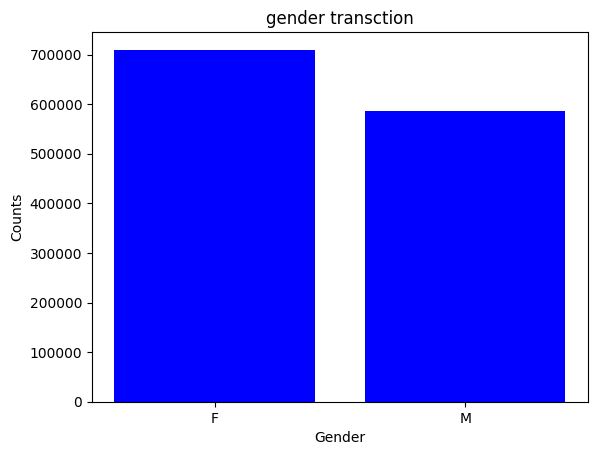

In [56]:
def gendercount(df):
    gender = df['gender'].value_counts()
    print(gender)
    gender = pd.Series.to_dict(gender)
    gendnam = list(gender.keys())
    gendcnt = list(gender.values())
    plt.bar(gendnam,gendcnt,color = 'blue')
    plt.xlabel("Gender")
    plt.ylabel("Counts")
    plt.title("gender transction")
    plt.show()

gendercount(train_df)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


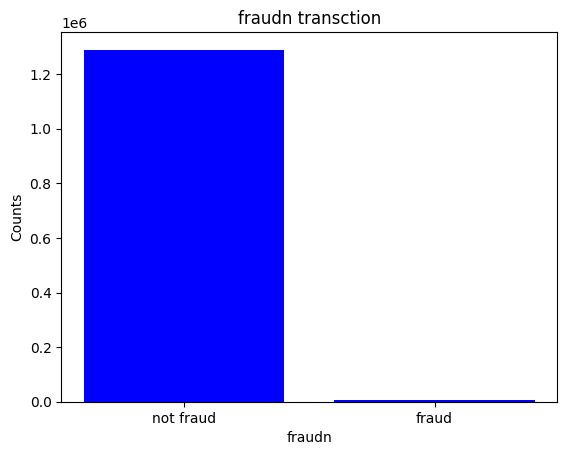

In [57]:
def isfraudcount(df):
    fraudn = df['is_fraud'].value_counts()
    print(fraudn)
    fraudn = pd.Series.to_dict(fraudn)
    fraudlable = list(fraudn.keys())
    fraudcnt = list(fraudn.values())
    plt.bar(fraudlable,fraudcnt,color = 'blue')
    plt.xlabel("fraudn")
    plt.ylabel("Counts")
    plt.xticks(fraudlable,['not fraud','fraud'])
    plt.title("fraudn transction")
    plt.show()

isfraudcount(train_df)

## Severely biased dataset, only 0.57 % values are fraud.
This will lead to our model overfittng on data.
We can try methods like undersampling and Cross validation.
Additionally, we can use RandomForest to try to 'catch' the features

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64


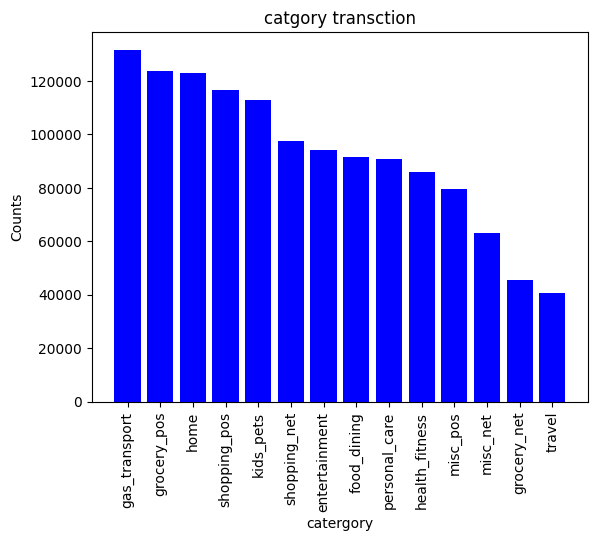

In [58]:
def categorycount(df):
    catgory = df['category'].value_counts()
    print(catgory)
    catgory = pd.Series.to_dict(catgory)
    catname = list(catgory.keys())
    catcnt = list(catgory.values())
    plt.bar(catname,catcnt,color = 'blue')
    plt.xlabel("catergory")
    plt.ylabel("Counts")
    plt.title("catgory transction")
    plt.xticks(rotation=90)
    plt.show()

categorycount(train_df)

# Random Forest Gen

Columns like merchant, cc_num, category, job can be one-hot encoded/LabelEncoded

In [59]:
def randomForest(train_df_fnx, test_df_fnx):

    trn_df = train_df_fnx
    tst_df = test_df_fnx

    enc = LabelEncoder()

    print("Label encoding...")

    trn_df["merchant"] = enc.fit_transform(trn_df["merchant"])
    trn_df["category"] = enc.fit_transform(trn_df["category"])
    trn_df["gender"] = enc.fit_transform(trn_df["gender"])
    trn_df["job"] = enc.fit_transform(trn_df["job"])
    trn_df["first"] = enc.fit_transform(trn_df["first"])
    trn_df["last"] = enc.fit_transform(trn_df["last"])

    # remove seemingly useless columns
    trn_df.drop(columns=['Unnamed: 0','cc_num','street','city','state','zip','trans_num','dob','trans_date_trans_time'], inplace=True)
    # training tym :D
    X = trn_df.drop(columns=['is_fraud'], inplace = False)
    y = trn_df['is_fraud']

    print("model RF fitting...")

    model = RandomForestClassifier(n_estimators=100,max_depth=75)

    model.fit(X,y)

    print("Training set: ",model.score(X, y))
    #☠️☠️
    

    # testing time;
    enc = LabelEncoder()

    tst_df["merchant"] = enc.fit_transform(tst_df["merchant"])
    tst_df["category"] = enc.fit_transform(tst_df["category"])
    tst_df["gender"] = enc.fit_transform(tst_df["gender"])
    tst_df["job"] = enc.fit_transform(tst_df["job"])
    tst_df["first"] = enc.fit_transform(tst_df["first"])
    tst_df["last"] = enc.fit_transform(tst_df["last"])

    tst_df.drop(columns=['Unnamed: 0','cc_num','street','city','state','zip','trans_num','dob','trans_date_trans_time'], inplace=True)

    X = tst_df.drop(columns=['is_fraud'], inplace = False)
    y = tst_df['is_fraud']

    print("testing set: ",model.score(X,y))

    y_pred_model_test = model.predict(X)

    return (y_pred_model_test,model)

In [60]:
(y_pred,rfmodelauto) = randomForest(train_df,test_df)

Training set:  0.9999976863901903
testing set:  0.9972881978122037


In [61]:
checker = test_df['is_fraud'].value_counts()
print(checker)

is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [63]:
i = 0
for arr in y_pred:
    if arr==1:
        i+=1

print(i)

1264


We will use SMOTE with RF. Smote has to be used only while training.

In [73]:
def SMOTErandomForest(train_df_fnx, test_df_fnx):

    trn_df = train_df_fnx
    tst_df = test_df_fnx

    enc = LabelEncoder()

    print("Label encoding...")

    trn_df["merchant"] = enc.fit_transform(trn_df["merchant"])
    trn_df["category"] = enc.fit_transform(trn_df["category"])
    trn_df["gender"] = enc.fit_transform(trn_df["gender"])
    trn_df["job"] = enc.fit_transform(trn_df["job"])
    trn_df["first"] = enc.fit_transform(trn_df["first"])
    trn_df["last"] = enc.fit_transform(trn_df["last"])

    # remove seemingly useless columns
    trn_df.drop(columns=['Unnamed: 0','cc_num','street','city','state','zip','trans_num','dob','trans_date_trans_time'], inplace=True)
    
    # fit via smote
    print("SMOTE fitting...")
    smotemethod = SMOTE()
    # training tym :D
    X = trn_df.drop(columns=['is_fraud'], inplace = False)
    y = trn_df['is_fraud']

    X,y = smotemethod.fit_resample(X,y)


    print("Model RF fitting...")

    model = RandomForestClassifier(n_estimators=100,max_depth=75)

    model.fit(X,y)

    print("Training set: ",model.score(X, y))
    #☠️☠️
    

    # testing time;
    enc = LabelEncoder()

    tst_df["merchant"] = enc.fit_transform(tst_df["merchant"])
    tst_df["category"] = enc.fit_transform(tst_df["category"])
    tst_df["gender"] = enc.fit_transform(tst_df["gender"])
    tst_df["job"] = enc.fit_transform(tst_df["job"])
    tst_df["first"] = enc.fit_transform(tst_df["first"])
    tst_df["last"] = enc.fit_transform(tst_df["last"])

    tst_df.drop(columns=['Unnamed: 0','cc_num','street','city','state','zip','trans_num','dob','trans_date_trans_time'], inplace=True)

    X = tst_df.drop(columns=['is_fraud'], inplace = False)
    y = tst_df['is_fraud']

    # X,y = smotemethod.fit_resample(X,y)

    print("testing set: ",model.score(X,y))

    y_pred_model_test = model.predict(X)

    return (y_pred_model_test,model)

In [74]:
(y_pred_smote,rfmodelsmote) = SMOTErandomForest(train_df,test_df)

Label encoding...
SMOTE fitting...
Model RF fitting...
Training set:  1.0
testing set:  0.9948445167431742


In [75]:
checkerSMOTE = test_df['is_fraud'].value_counts()
print(checkerSMOTE)

is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [76]:
i = 0
for arr in y_pred_smote:
    if arr==1:
        i+=1

print(i)

1534


slightly better